In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)

In [3]:
clinical_csvpath = os.path.join('raw_data', 'clinicaltrial_data.csv')
mouse_csvpath = os.path.join('raw_data', 'mouse_drug_data.csv')
clinical_data = pd.read_csv(clinical_csvpath)
mouse_data = pd.read_csv(mouse_csvpath)
#clinical_data.head()

In [4]:
mouse_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [112]:
# grouping mouse data by drug, and then counting the number of mice (Mouse ID) per drug.  Shows as 25 mice per drug.
#mouse_data.groupby('Drug').count()

In [6]:
# Merging clinical and mouse data on 'Mouse ID', creating one merged data frame to modify throughout calling it 'Merged_data'
merged_data = pd.merge(clinical_data, mouse_data, on=['Mouse ID'])
merged_data = merged_data.set_index(['Drug'])

# Grouping merged_data by drug/timepoint, then counting the number of 'mouse id' per timepoint.
# Rename 'mouse id' to 'number alive'
mouse_death = merged_data.groupby(['Drug', 'Timepoint']).count()
mouse_death = mouse_death[['Mouse ID']].rename(columns={'Mouse ID':'Number Alive'})
mouse_death.head()


Number Alive
Drug      Timepoint              
Capomulin 0                    25
          5                    25
          10                   25
          15                   24
          20                   23

In [114]:
Capo_death = mouse_death.loc['Capomulin'].reset_index().rename(columns = {'Number Alive': 'Capomulin Death'})
Keta_death = mouse_death.loc['Ketapril'].reset_index().rename(columns = {'Number Alive':'Ketapril Death'})
Infu_death = mouse_death.loc['Infubinol'].reset_index().rename(columns = {'Number Alive': 'Infubinol Death'})
Plac_death = mouse_death.loc['Placebo'].reset_index().rename(columns = {'Number Alive': 'Placebo Death'})

merge_death_ck = pd.merge(Capo_death, Keta_death, on='Timepoint')
merge_death_ip = pd.merge(Infu_death, Plac_death, on='Timepoint')

total_death_merge = pd.merge(merge_death_ck, merge_death_ip, on='Timepoint')

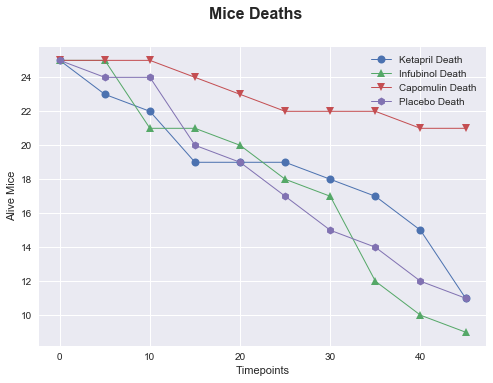

In [119]:
fig, ax1 = plt.subplots(1, sharex=True, sharey= True)
fig.suptitle("Mice Deaths", fontsize=16,
             fontweight="bold")

#ax1.set_xlim(min(year), max(year))
#ax1.plot(total_merge_CPKI['Timepoint'], new_merged_data.loc['Ketapril','Tumor Volume (mm3)'], linewidth=1, marker="o", markersize=8)
ax1.plot(total_death_merge['Timepoint'], total_death_merge['Ketapril Death'], linewidth=1, marker="o", markersize=8)
ax1.plot(total_death_merge['Timepoint'], total_death_merge['Infubinol Death'],linewidth=1, marker='^', markersize=8)
ax1.plot(total_death_merge['Timepoint'], total_death_merge['Capomulin Death'], linewidth=1, marker="v", markersize=8)
ax1.plot(total_death_merge['Timepoint'], total_death_merge['Placebo Death'],linewidth=1, marker='h', markersize=8)
ax1.set_ylabel("Alive Mice")
ax1.set_xlabel("Timepoints")
plt.legend()
plt.show()

In [7]:
control_data = merged_data.loc['Placebo']
control_data = control_data.groupby(['Drug','Timepoint']).mean()
#control_data

In [8]:
#len(infubinol_data)
#len(infubinol_data.loc['Infubinol', 'a203'])
#for index, row in infubinol_data.iterrows();
infubinol_data = merged_data.loc['Infubinol'].groupby(['Drug', 'Mouse ID', 'Timepoint']).sum()
#infubinol_data.head()

In [120]:
new_merged_data = merged_data.groupby(['Drug', 'Timepoint']).mean()
new_merged_data['Growth Inhibition'] = 1 - (new_merged_data['Tumor Volume (mm3)']/new_merged_data.loc['Placebo', 'Tumor Volume (mm3)'])
new_merged_data['Metastic Inhibition'] = 1 - (new_merged_data['Metastatic Sites']/new_merged_data.loc['Placebo', 'Metastatic Sites'])
new_merged_data = new_merged_data.fillna(0)
#new_merged_data

In [121]:
tumor_data = new_merged_data[['Tumor Volume (mm3)']]
#tumor_data.head()

In [46]:
capo_data = tumor_data.loc['Capomulin']
capo_data = capo_data.rename(columns={'Tumor Volume (mm3)': 'Capomulin'})
capo_data = capo_data.reset_index()

In [47]:
placebo_data = tumor_data.loc['Placebo']
placebo_data = placebo_data.rename(columns={'Tumor Volume (mm3)': 'Placebo'})
placebo_data = placebo_data.reset_index()

In [48]:
CP_merge = pd.merge(placebo_data, capo_data, on="Timepoint")
#CP_merge.head()

In [49]:
infubinol_data = tumor_data.loc['Infubinol']
infubinol_data = infubinol_data.rename(columns={'Tumor Volume (mm3)': 'Infubinol'})
infubinol_data = infubinol_data.reset_index()

In [50]:
ketapril_data = tumor_data.loc['Ketapril']
ketapril_data = ketapril_data.rename(columns={'Tumor Volume (mm3)': 'Ketapril'})
ketapril_data = ketapril_data.reset_index()

In [122]:
K_I_merge = pd.merge(infubinol_data, ketapril_data, on='Timepoint')
#K_I_merge.head()

In [123]:
total_merge_CPKI = pd.merge(K_I_merge, CP_merge, on='Timepoint')
total_merge_CPKI.set_index("Timepoint").head()

,Infubinol,Ketapril,Placebo,Capomulin
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.280000,0.304348,0.375000,0.160000
10,0.666667,0.590909,0.833333,0.320000
15,0.904762,0.842105,1.250000,0.375000
20,1.050000,1.210526,1.526316,0.652174


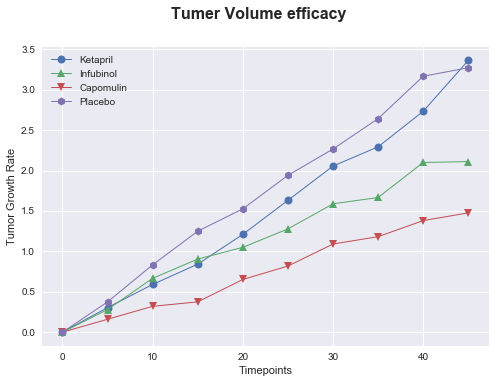

In [125]:
fig, ax1 = plt.subplots(1, sharex=True, sharey= True)
fig.suptitle("Tumer Volume efficacy", fontsize=16,
             fontweight="bold")

#ax1.set_xlim(min(year), max(year))
#ax1.plot(total_merge_CPKI['Timepoint'], new_merged_data.loc['Ketapril','Tumor Volume (mm3)'], linewidth=1, marker="o", markersize=8)
ax1.plot(total_merge_CPKI['Timepoint'], total_merge_CPKI['Ketapril'], linewidth=1, marker="o", markersize=8)
ax1.plot(total_merge_CPKI['Timepoint'], total_merge_CPKI['Infubinol'],linewidth=1, marker='^', markersize=8)
ax1.plot(total_merge_CPKI['Timepoint'], total_merge_CPKI['Capomulin'], linewidth=1, marker="v", markersize=8)
ax1.plot(total_merge_CPKI['Timepoint'], total_merge_CPKI['Placebo'],linewidth=1, marker='h', markersize=8)
ax1.set_ylabel("Tumor Growth Rate")
ax1.set_xlabel("Timepoints")
plt.legend()
plt.show()

In [77]:
meta_data = new_merged_data[['Metastatic Sites']]

In [83]:
capo_meta = meta_data.loc['Capomulin']
capo_meta = capo_data.rename(columns={'Metastatic Sites': 'Capomulin'})
capo_meta = capo_data.reset_index()
placebo_meta = meta_data.loc['Placebo']
placebo_meta = placebo_data.rename(columns={'Metastatic Sites': 'Placebo'})
placebo_meta = placebo_data.reset_index()
CP_meta_merge = pd.merge(placebo_data, capo_data, on="Timepoint")
CP_meta_merge = CP_merge.reset_index(drop=True)
CP_meta_merge

,Timepoint,Placebo,Capomulin
0,0,0.000000,0.000000
1,5,0.375000,0.160000
2,10,0.833333,0.320000
3,15,1.250000,0.375000
4,20,1.526316,0.652174
5,25,1.941176,0.818182
6,30,2.266667,1.090909
7,35,2.642857,1.181818
8,40,3.166667,1.380952
9,45,3.272727,1.476190


In [85]:
infubinol_meta = meta_data.loc['Infubinol']
infubinol_meta = infubinol_data.rename(columns={'Metastatic Sites': 'Infubinol'})
infubinol_meta = infubinol_data.reset_index()
ketapril_meta = meta_data.loc['Ketapril']
ketapril_meta = ketapril_data.rename(columns={'Metastatic Sites': 'Ketapril'})
ketapril_meta = ketapril_data.reset_index()
KI_meta_merge = pd.merge(infubinol_data, ketapril_data, on='Timepoint')
KI_meta_merge = K_I_merge.reset_index(drop=True)
KI_meta_merge

,Timepoint,Infubinol,Ketapril
0,0,0.000000,0.000000
1,5,0.280000,0.304348
2,10,0.666667,0.590909
3,15,0.904762,0.842105
4,20,1.050000,1.210526
5,25,1.277778,1.631579
6,30,1.588235,2.055556
7,35,1.666667,2.294118
8,40,2.100000,2.733333
9,45,2.111111,3.363636


In [88]:
total_meta_merge = pd.merge(K_I_merge, CP_merge, on='Timepoint')
total_meta_merge

,Timepoint,Infubinol,Ketapril,Placebo,Capomulin
0,0,0.000000,0.000000,0.000000,0.000000
1,5,0.280000,0.304348,0.375000,0.160000
2,10,0.666667,0.590909,0.833333,0.320000
3,15,0.904762,0.842105,1.250000,0.375000
4,20,1.050000,1.210526,1.526316,0.652174
5,25,1.277778,1.631579,1.941176,0.818182
6,30,1.588235,2.055556,2.266667,1.090909
7,35,1.666667,2.294118,2.642857,1.181818
8,40,2.100000,2.733333,3.166667,1.380952
9,45,2.111111,3.363636,3.272727,1.476190


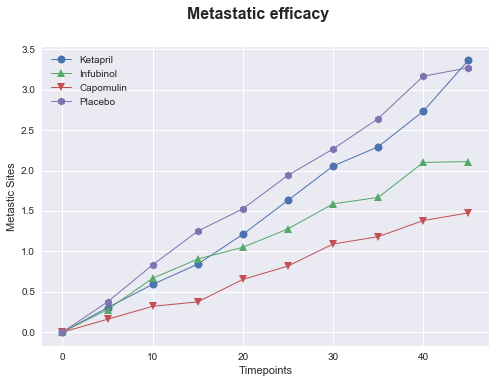

In [126]:
fig, ax1 = plt.subplots(1, sharex=True, sharey= True)
fig.suptitle("Metastatic efficacy", fontsize=16,
             fontweight="bold")

#ax1.set_xlim(min(year), max(year))
ax1.plot(total_meta_merge['Timepoint'], total_meta_merge['Ketapril'], linewidth=1, marker="o", markersize=8)
ax1.plot(total_meta_merge['Timepoint'], total_meta_merge['Infubinol'],linewidth=1, marker='^', markersize=8)
ax1.plot(total_meta_merge['Timepoint'], total_meta_merge['Capomulin'], linewidth=1, marker="v", markersize=8)
ax1.plot(total_meta_merge['Timepoint'], total_meta_merge['Placebo'],linewidth=1, marker='h', markersize=8)
ax1.set_ylabel("Metastic Sites")
ax1.set_xlabel("Timepoints")
plt.legend()
plt.show()